# CME538 - Introduction to Data Science
## Assignment 8 - Data Science Life Cycle

### Learning Objectives
After completing this assignment, you should be comfortable:

- Feature engineering
- Using sklearn to build simple and more complex linear models
- Building a data pipeline using pandas
- Identifying informative variables through EDA
- Feature engineering with categorical variables
- Classification using logistic regression
- Classification metrics

### Marking Breakdown

Question | Points
--- | ---
Question 1a | 1
Question 1b | 1
Question 1c | 1
Question 1d | 1
Question 2a | 1
Question 2b | 1
Question 2c | 1
Question 3a | 1
Question 3b | 1
Question 3c | 1
Question 3d | 1
Question 4a | 1
Question 4b | 1
Question 4c | 1
Question 4d | 1
Question 4e | 1
Question 4f | 1
Total | 17

One of the following marks below will be added to the **Total** above.

### Code Quality

| Rank | Points | Description |
| :-- | :-- | :-- |
| Youngling | 1 | Code is unorganized, variables names are not descriptive, redundant, memory-intensive, computationally-intensive, uncommented, error-prone, difficult to understand. |
| Padawan | 2 | Code is organized, variables names are descriptive, satisfactory utilization of memory and computational resources, satisfactory commenting, readable. |
| Jedi | 3 | Code is organized, easy to understand, efficient, clean, a pleasure to read. #cleancode |

## Setup Notebook

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Overview

In this assignment, you will use all the tools and knowledge that you've learned in class to explore and model New York Taxi data. You will create a regression model that predicts the travel time of a taxi ride and you will also create a binary classifier to predict whether or not someone will tip at the end of their ride. This assignment is meant to guide you through the complete Data Science Life Cycle. 

# The Data

Features of all [yellow taxi](https://en.wikipedia.org/wiki/Taxicabs_of_New_York_City) trips in January 2016 are published by the [NYC Taxi and Limosine Commission](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

The full dataset is over 1 GB, so we've placed a simple random sample of the data into `taxi.csv`.

Columns of the `taxi.csv` include:
- `pickup_datetime`: date and time when the meter was engaged
- `dropoff_datetime`: date and time when the meter was disengaged
- `pickup_lon`: the longitude where the meter was engaged
- `pickup_lat`: the latitude where the meter was engaged
- `dropoff_lon`: the longitude where the meter was disengaged
- `dropoff_lat`: the latitude where the meter was disengaged
- `passengers`: the number of passengers in the vehicle (driver entered value)
- `distance`: trip distance in miles
- `payment_method`: 1=Credit card, 2=Cash, 3=No charge, 4=Dispute
- `surcharge`: Improvement surcharge
- `tax`: State and municipal taxes
- `fare`: the time-and-distance fare calculated by the meter
- `tip`: the amount of credit card tips, cash tips are not included

# 1. Data Selection and Cleaning

In this part, you will limit the data to trips that began and ended on Manhattan Island ([map](https://www.google.com/maps/place/Manhattan,+New+York,+NY/@40.7590402,-74.0394431,12z/data=!3m1!4b1!4m5!3m4!1s0x89c2588f046ee661:0xa0b3281fcecc08c!8m2!3d40.7830603!4d-73.9712488)). 

## Question 1a
Import `taxi.csv` as a DataFrame and assign it to a variable called `all_taxi`. 

Only include trips that have **both** pick-up and drop-off locations within the boundaries of New York City:

- Longitude is between -74.03 and -73.75 (inclusive of both boundaries)
- Latitude is between 40.6 and 40.88 (inclusive of both boundaries)

In [2]:
# Write your code here
all_taxi = pd.read_csv("taxi.csv")
all_taxi = all_taxi[(all_taxi['pickup_lat'] >= 40.6) & (all_taxi['pickup_lat'] <= 40.88)]
all_taxi = all_taxi[(all_taxi['dropoff_lat'] >= 40.6) & (all_taxi['dropoff_lat'] <= 40.88)]
all_taxi = all_taxi[(all_taxi['dropoff_lon'] <= -74.03) & (all_taxi['dropoff_lat'] >= -73.75)]
all_taxi = all_taxi[(all_taxi['pickup_lon'] <= -74.03) & (all_taxi['dropoff_lat'] >= -73.75)]

# View DataFrame
all_taxi.head()

,pickup_datetime,dropoff_datetime,passengers,distance,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,payment_method,surcharge,tax,fare,tip
4116,2016-01-22 21:15:44,2016-01-22 21:16:12,1,0.4,40.695030,-74.178085,40.695026,-74.178085,1,0.3,0.0,19.70,0.00
7885,2016-01-12 12:02:18,2016-01-12 12:02:48,2,0.0,40.687775,-74.181389,40.687759,-74.181374,1,0.3,0.5,77.00,0.00
15289,2016-01-30 14:04:34,2016-01-30 14:08:33,1,0.0,40.690434,-74.177589,40.690483,-74.177582,2,0.3,0.0,0.01,0.00
22461,2016-01-26 19:59:53,2016-01-26 20:05:00,1,1.7,40.731514,-74.038628,40.739262,-74.066437,3,0.3,0.0,0.00,0.00
22897,2016-01-15 03:19:34,2016-01-15 03:19:51,1,0.0,40.618568,-74.124191,40.618568,-74.124191,1,0.3,0.0,56.00,13.45


## Question 1b
Create a plot of pickup locations using Folium and the `HeatMap` function. The `HeatMap` will show the density of pickup locations in different areas of the city, where red areas have relatively more pickups. As you can see, most of the pickups are in Manhattan in addition to two hot spots corresponding to airports. Your plot should look like this (radius = 10).
<br>
<img src="images/q1b.png" alt="drawing" width="500"/>
<br> 

In [3]:
!pip install folium

You should consider upgrading via the '/Users/ab/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
import folium
from folium import Circle
from folium.plugins import HeatMap

In [5]:
# Create a map of New York
map_1 = folium.Map(location=[40.7484, -73.9857], 
                   tiles='cartodbpositron', 
                   zoom_start=10)

# Write your code here
all_taxi_gdf = gpd.GeoDataFrame(all_taxi,geometry= gpd.points_from_xy(all_taxi.pickup_lon, all_taxi.pickup_lat))
all_taxi_gdf.crs = {'init': 'epsg:4326'}

HeatMap(data=list(zip(all_taxi_gdf.to_crs(epsg=4326).geometry.y,
                      all_taxi_gdf.to_crs(epsg=4326).geometry.x)),radius=10).add_to(map_1)

# Display map
map_1

## Question 1c
We'll be trying to estimate the duration of a taxi ride and therefore, we will need to compute the duration of each ride. Create a new column in `all_taxi` called `'duration'` and assign to it the length of the taxi ride in seconds. The datatype for `'duration'` should be `int`. 

In [6]:
# Convert to datetime and localize to EST
all_taxi['pickup_datetime'] = pd.to_datetime(all_taxi['pickup_datetime'], errors='coerce')
all_taxi['dropoff_datetime'] = pd.to_datetime(all_taxi['dropoff_datetime'], errors='coerce')
all_taxi['pickup_datetime'] = all_taxi['pickup_datetime'].dt.tz_localize(tz='EST')
all_taxi['dropoff_datetime'] = all_taxi['dropoff_datetime'].dt.tz_localize(tz='EST')

# iterate over df rows and add difference to a dictionary
each_trip_duration = {}
for index, row in all_taxi.iterrows():
    each_trip_duration[index]= (int((row['dropoff_datetime'] - row['pickup_datetime']).total_seconds()))

# convert dictionary to series and add to 'duration' column
all_taxi['duration'] = pd.Series(each_trip_duration)

all_taxi.head()

,pickup_datetime,dropoff_datetime,passengers,distance,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,payment_method,surcharge,tax,fare,tip,geometry,duration
4116,2016-01-22 21:15:44-05:00,2016-01-22 21:16:12-05:00,1,0.4,40.695030,-74.178085,40.695026,-74.178085,1,0.3,0.0,19.70,0.00,POINT (-74.17809 40.69503),28
7885,2016-01-12 12:02:18-05:00,2016-01-12 12:02:48-05:00,2,0.0,40.687775,-74.181389,40.687759,-74.181374,1,0.3,0.5,77.00,0.00,POINT (-74.18139 40.68777),30
15289,2016-01-30 14:04:34-05:00,2016-01-30 14:08:33-05:00,1,0.0,40.690434,-74.177589,40.690483,-74.177582,2,0.3,0.0,0.01,0.00,POINT (-74.17759 40.69043),239
22461,2016-01-26 19:59:53-05:00,2016-01-26 20:05:00-05:00,1,1.7,40.731514,-74.038628,40.739262,-74.066437,3,0.3,0.0,0.00,0.00,POINT (-74.03863 40.73151),307
22897,2016-01-15 03:19:34-05:00,2016-01-15 03:19:51-05:00,1,0.0,40.618568,-74.124191,40.618568,-74.124191,1,0.3,0.0,56.00,13.45,POINT (-74.12419 40.61857),17


## Question 1d
Create a DataFrame called `clean_taxi` that only includes trips with a positive passenger count, a positive distance, a duration of at least 1 minute and at most 1 hour, and an average speed of at most 100 miles per hour. Inequalities should not be strict (e.g., `<=` instead of `<`) unless comparing to 0. You will need to first create a new column in `all_taxi` called `'speed'` and assign to it the average speed in miles per hour.

In [7]:
# iterate through df and add only clean taxis to a dictioanry

clean_taxi_dict = {}

for index, row in all_taxi.iterrows():
    if row['passengers'] > 0 and (row['duration'] >= 60 and row['duration'] <= 3600) and (row['distance']/(row['duration']/3600)):
        clean_taxi_dict[index] = 'clean'
        
    

#add dictionary to new column in all_taxi called 'clean'
all_taxi ['clean'] = pd.Series(clean_taxi_dict)

#filter only clean from all_taxi and add it to new df called 'clean_taxi'
clean_taxi = all_taxi[all_taxi['clean'] == 'clean']

#drop clean column for clarity and consistency
clean_taxi.drop(['clean'], axis = 1, inplace = True) 

# View DataFrame
clean_taxi.head()

,pickup_datetime,dropoff_datetime,passengers,distance,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,payment_method,surcharge,tax,fare,tip,geometry,duration
22461,2016-01-26 19:59:53-05:00,2016-01-26 20:05:00-05:00,1,1.70,40.731514,-74.038628,40.739262,-74.066437,3,0.3,0.0,0.00,0.00,POINT (-74.03863 40.73151),307
35480,2016-01-12 09:16:38-05:00,2016-01-12 09:23:38-05:00,2,1.17,40.683941,-74.101196,40.683941,-74.101196,1,0.3,0.5,7.00,1.20,POINT (-74.10120 40.68394),420
60510,2016-01-12 15:53:07-05:00,2016-01-12 15:54:58-05:00,1,13.00,40.690445,-74.177643,40.690701,-74.177475,1,0.3,0.0,75.00,10.00,POINT (-74.17764 40.69044),111
63671,2016-01-11 22:16:55-05:00,2016-01-11 22:18:01-05:00,1,6.50,40.721851,-74.045219,40.721855,-74.045219,1,0.3,0.0,62.00,12.45,POINT (-74.04522 40.72185),66
65236,2016-01-26 00:07:51-05:00,2016-01-26 00:11:43-05:00,1,1.00,40.731480,-74.039314,40.721268,-74.037857,1,0.3,0.0,67.85,17.00,POINT (-74.03931 40.73148),232


Next, we want to collect trips from `clean_taxi` that start and end within the boundaries of Manhattan Island.

We're in luck because `GeoPandas` has a builtin dataset for the boundaries of New York Boroughs.

In [8]:
path = gpd.datasets.get_path('nybb')
boroughs = gpd.read_file(path)
boroughs.set_index('BoroCode', inplace=True)
boroughs.sort_index(inplace=True)
boroughs.to_crs(epsg=4326, inplace=True)
boroughs.head()

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


Let's plot these quickly.

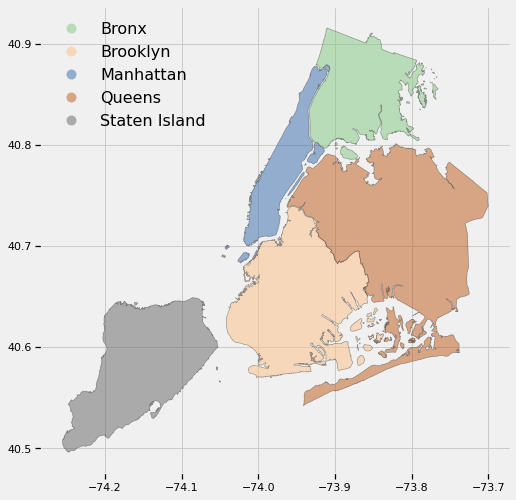

In [9]:
ax = boroughs.plot(figsize=(8, 8), column='BoroName', categorical=True, 
                   cmap='Accent', linewidth=.6, edgecolor='0.2', alpha=0.5,
                   legend=True, legend_kwds={'loc': 2,'fontsize':16, 
                                             'frameon':False})

Let's create a new DataFrame called `manhattan_taxi` that only includes trips from `clean_taxi` that start and end within the boundaries of Manhattan Island.

In [65]:
!pip install shapely

You should consider upgrading via the '/Users/ab/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [66]:
from shapely.geometry import MultiPoint

First we have to create a `MultiPoint` geometry for each trip (pickup and dropoff).

In [67]:
clean_taxi['geometry'] = clean_taxi.apply(lambda row: MultiPoint([(row['pickup_lon'], row['pickup_lat']), 
                                                                  (row['dropoff_lon'], row['dropoff_lat'])]), axis=1)
clean_taxi = gpd.GeoDataFrame(clean_taxi)
clean_taxi.head()

,pickup_datetime,dropoff_datetime,passengers,distance,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,payment_method,surcharge,tax,fare,tip,duration,geometry
22461,2016-01-26 19:59:53-05:00,2016-01-26 20:05:00-05:00,1,1.70,40.731514,-74.038628,40.739262,-74.066437,3,0.3,0.0,0.00,0.00,307,"MULTIPOINT (-74.03863 40.73151, -74.06644 40.7..."
35480,2016-01-12 09:16:38-05:00,2016-01-12 09:23:38-05:00,2,1.17,40.683941,-74.101196,40.683941,-74.101196,1,0.3,0.5,7.00,1.20,420,"MULTIPOINT (-74.10120 40.68394, -74.10120 40.6..."
60510,2016-01-12 15:53:07-05:00,2016-01-12 15:54:58-05:00,1,13.00,40.690445,-74.177643,40.690701,-74.177475,1,0.3,0.0,75.00,10.00,111,"MULTIPOINT (-74.17764 40.69044, -74.17747 40.6..."
63671,2016-01-11 22:16:55-05:00,2016-01-11 22:18:01-05:00,1,6.50,40.721851,-74.045219,40.721855,-74.045219,1,0.3,0.0,62.00,12.45,66,"MULTIPOINT (-74.04522 40.72185, -74.04522 40.7..."
65236,2016-01-26 00:07:51-05:00,2016-01-26 00:11:43-05:00,1,1.00,40.731480,-74.039314,40.721268,-74.037857,1,0.3,0.0,67.85,17.00,232,"MULTIPOINT (-74.03931 40.73148, -74.03786 40.7..."


Next, for each trip we need to check if it started and ended within Manhattan.

In [ ]:
manhattan_taxi = clean_taxi[clean_taxi.within(boroughs[boroughs['BoroName'] == 'Manhattan'].iloc[0].geometry)]

Let's see if our filtering worked.

In [ ]:
ax = boroughs.plot(figsize=(8, 8), column='BoroName', categorical=True, 
                   cmap='Accent', linewidth=.6, edgecolor='0.2', alpha=0.5,
                   legend=True, legend_kwds={'loc': 2,'fontsize':16, 
                                             'frameon':False})
manhattan_taxi.plot(ax=ax, markersize=0.00001, color='r');

It worked! That filtering operation takes quite a bit of time, so let's save a `.csv` and create a checkpoint.

In [ ]:
manhattan_taxi.to_csv('manhattan_taxi.csv', index=False)

## Question 1e (ungraded)
In the following cell, print a summary of the data selection and cleaning you performed. For example, you should print something like: "Of the original 1000 trips, 21 anomolous trips (2.1%) were removed through data cleaning, and then the 600 trips within Manhattan were selected for further analysis." (Note that the numbers in this example are not accurate.)

_Type your answer here, replacing this text._

# Predicting Trip Duration
In this section, you will develop a machine learning model to predict the duration of taxi trips in New York.

# 2. Exploratory Data Analysis
In this part, you'll choose which days to include as training data in your regression model. 

Your goal is to develop a general model that could potentially be used for future taxi rides. There is no guarantee that future distributions will resemble observed distributions, but some effort to limit training data to typical examples can help ensure that the training data are representative of future observations.

January 2016 had some atypical days. New Years Day (January 1) fell on a Friday. MLK Day was on Monday, January 18. A [historic blizzard](https://en.wikipedia.org/wiki/January_2016_United_States_blizzard) passed through New York that month. Using this dataset to train a general regression model for taxi trip times must account for these unusual phenomena, and one way to account for them is to remove atypical days from the training data.

## Question 2a
Add a new column named `'date'` to `manhattan_taxi` that contains the date (but not the time) of pickup.

In [10]:
# Write your code here
manhattan_taxi = pd.read_csv("manhattan_taxi.csv")
manhattan_taxi['date'] = pd.to_datetime(manhattan_taxi['pickup_datetime']).dt.date

# View DataFrame
manhattan_taxi.head()

,pickup_datetime,dropoff_datetime,passengers,distance,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,payment_method,surcharge,tax,fare,tip,duration,speed,geometry,date
0,2016-01-22 23:58:43-05:00,2016-01-23 00:00:20-05:00,2,0.20,40.741268,-74.001480,40.743977,-73.999565,2,0.3,0.5,3.0,0.0,97,7.422680,MULTIPOINT (-74.00148010253906 40.741268157958...,2016-01-22
1,2016-01-03 10:04:26-05:00,2016-01-03 10:12:25-05:00,1,2.02,40.780983,-73.956734,40.758957,-73.976898,2,0.3,0.5,8.5,0.0,479,15.181628,MULTIPOINT (-73.95673370361328 40.780982971191...,2016-01-03
2,2016-01-04 18:38:53-05:00,2016-01-04 18:45:42-05:00,3,1.30,40.711304,-74.008713,40.727184,-74.005150,2,0.3,0.5,7.0,0.0,409,11.442543,MULTIPOINT (-74.00871276855469 40.711303710937...,2016-01-04
3,2016-01-14 10:16:54-05:00,2016-01-14 10:27:13-05:00,1,2.00,40.707825,-74.001762,40.715496,-74.015656,1,0.3,0.5,10.0,3.2,619,11.631664,MULTIPOINT (-74.00176239013672 40.707824707031...,2016-01-14
4,2016-01-31 16:30:50-05:00,2016-01-31 16:33:21-05:00,1,0.60,40.760883,-73.960930,40.767666,-73.959328,1,0.3,0.5,4.0,1.2,151,14.304636,MULTIPOINT (-73.96092987060547 40.760883331298...,2016-01-31


## Question 2b
Create a data visualization that allows you to identify which dates were affected by the historic blizzard of January 2016. Make sure that the visualization type is appropriate for the visualized data.

Hint: How do you expect taxi usage to differ on blizzard days?

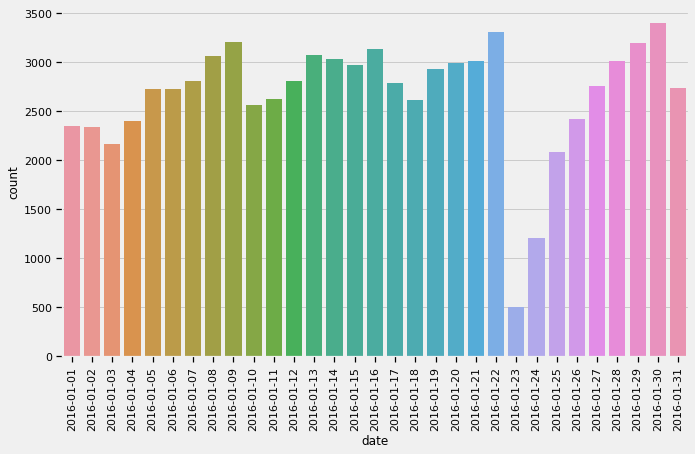

In [11]:
plt.figure(figsize=(10,6))
chart = sns.countplot(x= 'date', data= manhattan_taxi.sort_values('date'))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#don't show the label objects:
None 

## Question 2c
We have generated a list of dates that should have a fairly typical distribution of taxi rides, which excludes holidays and blizzards.

In [12]:
import re
import calendar

print('Typical dates:\n')
pat = '  [1-3]|18 | 23| 24|25 |26 '
print(re.sub(pat, '   ', calendar.month(2016, 1)))

Typical dates:

    January 2016
Mo Tu We Th Fr Sa Su
                    
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
   19 20 21 22      
      27 28 29 30 31



In [13]:
atypical = [1, 2, 3, 18, 23, 24, 25, 26]
typical_dates = [n for n in range(1, 32) if n not in atypical]
print(typical_dates)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 27, 28, 29, 30, 31]


Create a new DataFrame that only contains `typical_dates` and assign it to a new variable called `final_taxi`.

In [14]:

# creating a new column with only day values from datetime
manhattan_taxi['new'] = pd.to_datetime(manhattan_taxi['pickup_datetime']).dt.day

#create dictionary that will contain index and values as 'true' for only such days that are typical
dict_with_typical_dates = {}
        
#iterate over df and then over our list for typical dates (that was we can check for days)
for index, row in manhattan_taxi.iterrows():
    for i in typical_dates:
        if i in manhattan_taxi['new']:
            dict_with_typical_dates[index] = 'true'
            
#add dictionary to new column in all_taxi called 'clean'
manhattan_taxi['true'] = pd.Series(dict_with_typical_dates)

#filter only 'true' from manhattan_taxi and add it to new df called 'final_taxi'
final_taxi = manhattan_taxi[manhattan_taxi['true'] == 'true']

#drop true column and new column for clarity and consistency
final_taxi.drop(['true'], axis = 1, inplace = True) 
final_taxi.drop(['new'], axis = 1, inplace = True) 
    

# View DataFrame
final_taxi.head()

,pickup_datetime,dropoff_datetime,passengers,distance,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,payment_method,surcharge,tax,fare,tip,duration,speed,geometry,date
0,2016-01-22 23:58:43-05:00,2016-01-23 00:00:20-05:00,2,0.20,40.741268,-74.001480,40.743977,-73.999565,2,0.3,0.5,3.0,0.0,97,7.422680,MULTIPOINT (-74.00148010253906 40.741268157958...,2016-01-22
1,2016-01-03 10:04:26-05:00,2016-01-03 10:12:25-05:00,1,2.02,40.780983,-73.956734,40.758957,-73.976898,2,0.3,0.5,8.5,0.0,479,15.181628,MULTIPOINT (-73.95673370361328 40.780982971191...,2016-01-03
2,2016-01-04 18:38:53-05:00,2016-01-04 18:45:42-05:00,3,1.30,40.711304,-74.008713,40.727184,-74.005150,2,0.3,0.5,7.0,0.0,409,11.442543,MULTIPOINT (-74.00871276855469 40.711303710937...,2016-01-04
3,2016-01-14 10:16:54-05:00,2016-01-14 10:27:13-05:00,1,2.00,40.707825,-74.001762,40.715496,-74.015656,1,0.3,0.5,10.0,3.2,619,11.631664,MULTIPOINT (-74.00176239013672 40.707824707031...,2016-01-14
4,2016-01-31 16:30:50-05:00,2016-01-31 16:33:21-05:00,1,0.60,40.760883,-73.960930,40.767666,-73.959328,1,0.3,0.5,4.0,1.2,151,14.304636,MULTIPOINT (-73.96092987060547 40.760883331298...,2016-01-31


You are welcome to perform more exploratory data analysis, but your work will not be scored. Here's a blank cell to use if you wish. In practice, further exploration would be warranted at this point, but we won't require that of you.

In [ ]:
# Write your code here

# 3. Feature Engineering

In this section, you'll create a feature set for your linear regression model. You decide to predict trip duration from the following inputs: start location, end location, trip distance, time of day, and day of the week (*Monday, Tuesday, etc.*). 

You will ensure that the process of transforming observations into a feature set is expressed as a Python function called `create_features`, so that it's easy to make predictions for different samples in later parts of the assignment.

Because you are going to look at the data in detail in order to define features, it's best to split the data into training, validation and test sets now, then only inspect the training set. Remember what we learned in Lecture 21 about a form a data leakage called train/test contamination. Do not touch your test dataset until your final model is trained.

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_taxi, train_size=0.7, 
                               test_size=0.3, random_state=0)
val, test = train_test_split(test, train_size=0.5,
                             test_size=0.5, random_state=0)
print('Train:', train.shape, 'Val:', val.shape, 'Test:', test.shape)

Train: (58067, 17) Val: (12443, 17) Test: (12443, 17)


## Question 3a
Create a box plot that compares the distributions of taxi trip durations for each day using `train` only. Individual dates should appear on the horizontal axis, and duration values should appear on the vertical axis. Your plot should look like the following.

<br>
<img src="images/q3a.png" alt="drawing" width="500"/>
<br> 

Hint: Use sns.boxplot

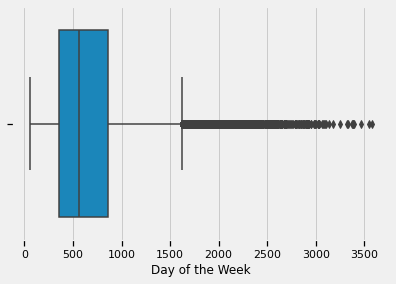

In [16]:
# Write your code here
ax = sns.boxplot(train["duration"])
ax.set_xlabel('Day of the Week');


## Question 3b
Add the following features to `train`, `val` and `test`. 

- `hour`: The integer hour of the pickup time. E.g., a 3:45pm taxi ride would have `15` as the hour. A 12:20am ride would have `0`.
- `day`: The day of the week with Monday=0, Sunday=6.
- `weekend`: 1 if and only if the `day` is Saturday or Sunday.
- `period`: 1 for early morning (12am-6am), 2 for daytime (6am-6pm), and 3 for night (6pm-12pm). Hint: np.digitize()

Because we have to do this for `train`, `val` and `test`, create a function called `add_features`.

In [17]:
def add_features(df):
    """Augment a dataframe df with additional features."""
    df_temp = df.copy()
    
    # Write your code here
    df_temp.loc[:, 'hour'] = pd.to_datetime(final_taxi['pickup_datetime']).dt.hour
    df_temp.loc[:, 'day'] =  pd.to_datetime(final_taxi['pickup_datetime']).dt.dayofweek
    df_temp.loc[:, 'weekend'] = pd.to_datetime(final_taxi['pickup_datetime']).dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
    df_temp.loc[:, 'period'] = pd.to_datetime(final_taxi['pickup_datetime']).dt.hour.apply(lambda x: 1 if (x>=0 and x<=6) else (2 if (x>6 and x<=18) else 3))
    
    return df_temp

# Add features to train , val and test
train = add_features(train)
val = add_features(val)
test = add_features(test)

# View train DataFrame
train.head()

,pickup_datetime,dropoff_datetime,passengers,distance,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,payment_method,surcharge,...,fare,tip,duration,speed,geometry,date,hour,day,weekend,period
68646,2016-01-27 10:51:04-05:00,2016-01-27 11:07:49-05:00,4,2.47,40.787163,-73.977470,40.762646,-73.969658,1,0.3,...,12.0,1.20,1005,8.847761,MULTIPOINT (-73.97747039794923 40.787162780761...,2016-01-27,10,2,0,2
30349,2016-01-29 13:46:07-05:00,2016-01-29 14:00:41-05:00,1,1.94,40.739101,-73.985252,40.758919,-73.970772,1,0.3,...,10.5,2.26,874,7.990847,MULTIPOINT (-73.98525238037109 40.739101409912...,2016-01-29,13,4,0,2
35156,2016-01-13 06:36:13-05:00,2016-01-13 06:43:01-05:00,1,1.72,40.739094,-73.986839,40.758427,-73.973648,1,0.3,...,8.0,1.76,408,15.176471,MULTIPOINT (-73.98683929443358 40.739093780517...,2016-01-13,6,2,0,1
22632,2016-01-25 18:23:54-05:00,2016-01-25 18:49:01-05:00,3,2.29,40.740341,-73.994713,40.766891,-73.983292,1,0.3,...,16.0,3.56,1507,5.470471,MULTIPOINT (-73.99471282958984 40.740341186523...,2016-01-25,18,0,0,2
30571,2016-01-22 20:49:57-05:00,2016-01-22 20:57:06-05:00,1,0.90,40.736965,-73.989998,40.745728,-73.995323,2,0.3,...,6.5,0.00,429,7.552448,MULTIPOINT (-73.98999786376955 40.736965179443...,2016-01-22,20,4,0,3


## Question 3c
Use `sns.distplot` and `train` to create an overlaid histogram comparing the distribution of average speeds for taxi rides that start in the early morning (12am-6am), day (6am-6pm; 12 hours), and night (6pm-12am; 6 hours). Your plot should look like this.
<br>
<img src="images/q3c.png" alt="drawing" width="500"/>
<br> 

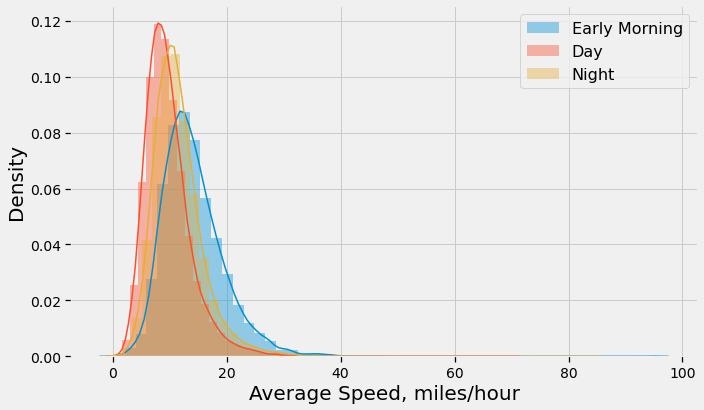

In [18]:
# Plot size:
plt.figure(figsize=(10,6))

# create different train data considering 'period':
ax1 = train[train['period']== 1]
ax2 = train[train['period']== 2]
ax3 = train[train['period']== 3]

# Plot charts:
sns.distplot(ax1['speed'])
sns.distplot(ax2['speed'])
sns.distplot(ax3['speed'])

# Set labels:
plt.xlabel('Average Speed, miles/hour', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

# Set labels font size:
plt.tick_params(axis='both', which='major', labelsize=14)

# Set legend:
plt.legend( loc= 'upper right', labels= ['Early Morning', 'Day', 'Night'], fontsize= 16)

plt.show()

Manhattan can roughly be divided into Lower, Midtown, and Upper regions. Instead of studying a map, let's approximate by finding the first principal component of the pick-up location (latitude and longitude). Before doing that, let's once again take a look at a scatterplot of trips in Manhattan.

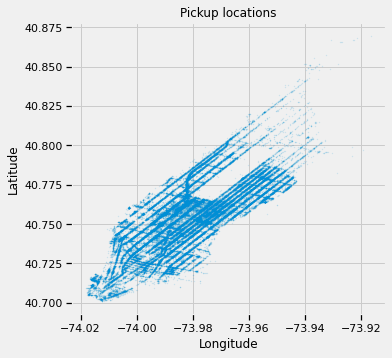

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(manhattan_taxi['pickup_lon'], 
            manhattan_taxi['pickup_lat'], s=0.1, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup locations');

Add a `region` column to `train`, `val` and `test` that categorizes each pick-up location as 0, 1, or 2 based on the value of each point's first principal component, such that an equal number of points fall into each region. 

Read the documentation of [`pd.qcut`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.qcut.html), which categorizes points in a distribution into equal-frequency bins.

In [20]:
from sklearn.decomposition import PCA

First, let's calculate the first principal component (PCA1) using `'pickup_lon'` and `'pickup_lat'` from `train`.

In [21]:
pca = PCA(n_components=1)
pca.fit(train[['pickup_lon', 'pickup_lat']])

PCA(n_components=1)

In [22]:
print('Principal component 1 explains {:.2f} % of the variance in "pickup_lon" and "pickup_lat".'.format(pca.explained_variance_ratio_[0] * 100))

Principal component 1 explains 88.40 % of the variance in "pickup_lon" and "pickup_lat".


Next, we need to transform `['pickup_lon', 'pickup_lat']` into principal component 1.

In [23]:
pc1 = pca.transform(train[['pickup_lon', 'pickup_lat']])
print('Original shape: ', train[['pickup_lat', 'pickup_lon']].shape)
print('Transformed shape of PC1: ', pc1.shape)

Original shape:  (58067, 2)
Transformed shape of PC1:  (58067, 1)


As we can see, we have reduced from 2 dimensions (2 features) to 1 dimension and this one dimension (or Principal Component), explains 88% of the variance in the original two dimensions. 

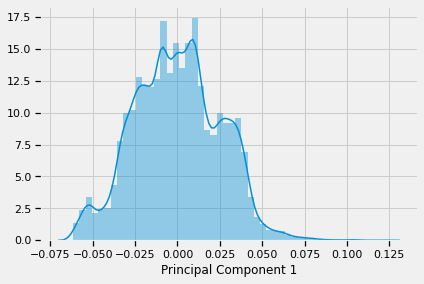

In [24]:
ax = sns.distplot(pc1)
ax.set_xlabel('Principal Component 1');

Below, you can see that our (latitude, longitude) locations have been collapsed to a single line.

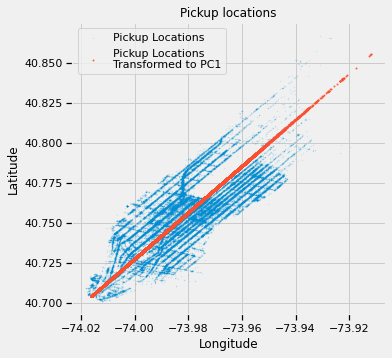

In [25]:
X_new = pca.inverse_transform(pc1)
plt.figure(figsize=(5, 5))
plt.scatter(train['pickup_lon'], 
            train['pickup_lat'], s=0.1, alpha=0.2, label='Pickup Locations')
plt.scatter(X_new[:, 0], X_new[:, 1], s=1, alpha=0.8, label='Pickup Locations\nTransformed to PC1')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup locations');

Next, we need to categorizes each pick-up location as 0, 1, or 2 based on the value of each point's first principal component `pc1`.

In [26]:
out, bins = pd.qcut(pc1.flatten(), 3, labels=[1, 2, 3], retbins=True)
print(out)
print(bins)

[3, 1, 1, 1, 1, ..., 3, 3, 1, 3, 1]
Length: 58067
Categories (3, int64): [1 < 2 < 3]
[-0.06146943 -0.01102552  0.01062251  0.12227556]


Let's see what these regions look like.

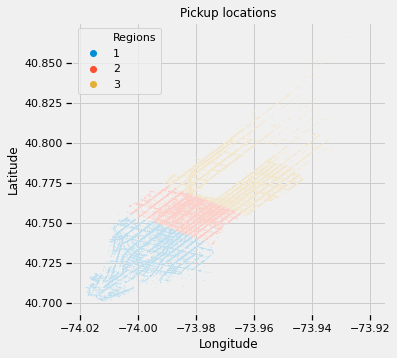

In [27]:
X_new = pca.inverse_transform(pc1)
plt.figure(figsize=(5, 5))
sns.scatterplot(train['pickup_lon'], 
                train['pickup_lat'], 
                hue=out, s=1, alpha=0.2, label='Regions')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup locations');

Next, let's create a function `add_region` so we can reuse this workflow.

In [28]:
pca = PCA(n_components=1)
pca.fit(train[['pickup_lon', 'pickup_lat']])
pc1 = pca.transform(train[['pickup_lon', 'pickup_lat']])
out, bins = pd.qcut(pc1.flatten(), 3, labels=[1, 2, 3], retbins=True)

def add_region(df, pca, bins):
    """Add a "region" column to df_temp."""
    df_temp = df.copy()
    
    # Write your code here
    pc1 = pca.transform(df_temp[['pickup_lon', 'pickup_lat']])
    df_temp['region'] = pd.cut(pc1.flatten(), 
                               [-np.inf, bins[1], bins[2], np.inf], 
                               labels=[1, 2, 3])
    
    return df_temp

# Now let's add 'region' to train, val and test
train = add_region(train, pca, bins)
val = add_region(val, pca, bins)
test = add_region(test, pca, bins)

Below, we compare the `region`'s calculated from the training dataset and applied to the validation dataset.

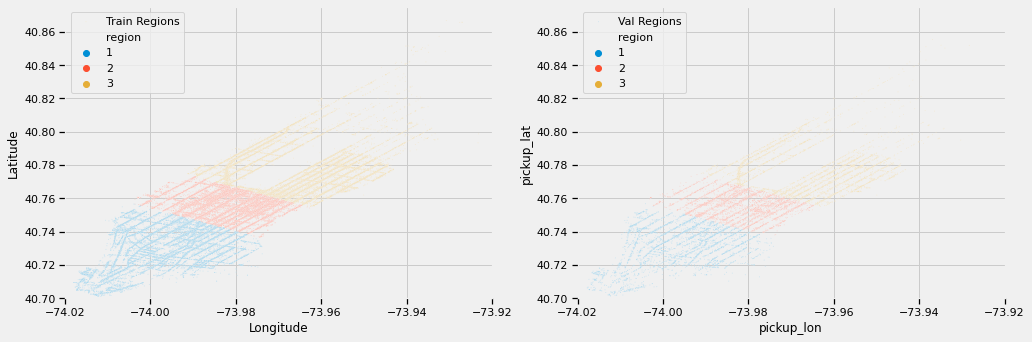

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=train, x='pickup_lon', y='pickup_lat', hue='region',
                s=1, alpha=0.2, label='Train Regions', ax=ax1)
ax1.set_xlim([-74.02, -73.92])
ax1.set_ylim([40.7, 40.875])
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend()

sns.scatterplot(data=val, x='pickup_lon', y='pickup_lat', hue='region',
                s=1, alpha=0.2, label='Val Regions', ax=ax2)
ax2.set_xlim([-74.02, -73.92])
ax2.set_ylim([40.7, 40.875])
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax2.legend();

Pay attention to this important step in the workflow. You'll notice that `pc1` and the `region` bin limits where computed exclusively from the training dataset and then applied to the validation and test datasets. This is important for ensure no data leakage occurs. `#data-leakage`

## Question 3d
Use `sns.distplot` to create an overlaid histogram comparing the distribution of speeds for morning taxi rides (12am-6am) in the three different regions defined above using `train`. Ponder if there is an association between region and average speed during the night.

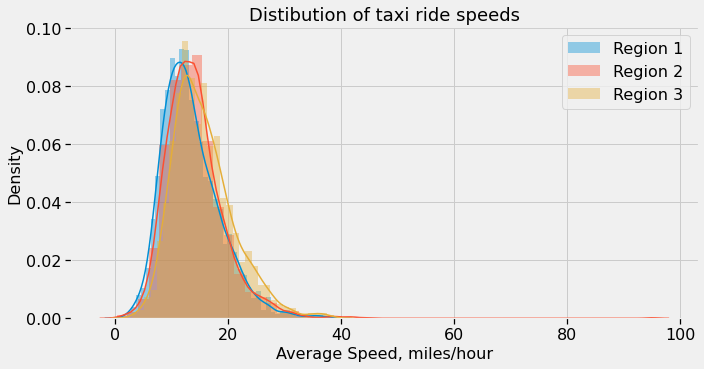

In [30]:
# Write your code here
# Plot size:
plt.figure(figsize=(10,5))
plt.title('Distibution of taxi ride speeds', fontsize = 18)

# Plot charts:
chart = sns.distplot(train[(train.period == 1) & (train.region == 1)].speed, label= 'Region 1')
sns.distplot(train[(train.period == 1) & (train.region == 2)].speed, label= 'Region 2', ax= chart)
sns.distplot(train[(train.period == 1) & (train.region == 3)].speed, label= 'Region 3', ax= chart)

# Set labels:
chart.set_ylabel('Density', fontsize= 16)
chart.set_xlabel('Average Speed, miles/hour', fontsize= 16)

# Set labels font size:
plt.tick_params(axis='both', which='major', labelsize=16)

# Set legend:
plt.legend(loc= 'upper right', fontsize= 16)

plt.show()

Lastly, let's create a feature set that includes our features of interest. Quantitative features are converted to standard units using `StandardScaler`, while categorical features are converted to dummy variables using `pd.get_dummies`. The `period` is not included because it is a linear combination of the `hour`. The `weekend` variable is not included because it is a linear combination of the `day`.  The `speed` is **NOT** included because it was computed from the `duration` and the `distance`. This would be an example of a type of data leakage called target leakage. This occurs when information about the training target leaks into the features.

In [31]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to use for modelling
num_features = ['pickup_lon', 'pickup_lat', 'dropoff_lon', 'dropoff_lat', 
                'distance']

# Define categorical features to use for modelling
cat_features = ['hour', 'day', 'region']

# Fit scaler (basically get the mean and stdev) for the training data
scaler = StandardScaler()
scaler.fit(train[num_features])

def create_features(df):
    """Create a feature set from taxi ride dataframe df."""
    scaled = df[num_features].copy()
    
    # Convert numeric features to standard units
    scaled.iloc[:, :] = scaler.transform(scaled) 
    
    # Convert categorical features using dummy encoding
    categoricals = [pd.get_dummies(df[s], prefix=s, drop_first=True) for s in cat_features]
    
    return pd.concat([scaled] + categoricals, axis=1)

# Let's test our function
create_features(train).head()

,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,distance,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_22,hour_23,day_1,day_2,day_3,day_4,day_5,day_6,region_2,region_3
68646,0.238667,1.527490,0.607315,0.273454,0.411679,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
30349,-0.244113,-0.726134,0.543124,0.117671,0.040869,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
35156,-0.342563,-0.726491,0.377370,0.097102,-0.113053,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
22632,-0.831022,-0.668000,-0.178366,0.450923,0.285743,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30571,-0.538515,-0.826303,-0.871718,-0.433709,-0.686759,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 4. Model Selection
In this part, you will select a regression model to predict the duration of a taxi ride.

## Question 4a
Assign `constant_rmse` to the root mean squared error on the validation set for a constant model that always predicts the mean duration of all training set taxi rides. Its always benefitial to have a simple (naive) baseline to compare our more sophisticated models too.

In [32]:
def rmse(errors):
    """Return the root mean squared error."""
    return np.sqrt(np.mean(errors ** 2))

# Write your code here
constant_rmse = rmse(val.duration -train.duration.mean())

# Print score
print('Constant model validation RMSE: {} seconds'.format(constant_rmse))

Constant model validation RMSE: 408.8587346008933 seconds


## Question 4b
Assign `simple_rmse` to the root mean squared error on the validation set for a simple linear regression model that uses only the distance of the taxi ride as a feature (and includes an intercept).

Simple linear regression means that there is only one feature. Multiple linear regression means that there is more than one feature. In either case, you can use the `LinearRegression` model from `sklearn` to fit the parameters to data.

In [33]:
from sklearn.linear_model import LinearRegression

# Write your code here
linear_model = LinearRegression(fit_intercept=True).fit(train['distance'].values.reshape(-1,1), train['duration'])
y_predicted = linear_model.predict(val['distance'].values.reshape(-1,1))
simple_rmse = rmse(y_predicted - val['duration'])

# Print score
print('Simple linear regression model validation RMSE: {} seconds'.format(simple_rmse))

Simple linear regression model validation RMSE: 288.3441049595394 seconds


## Question 4c
Assign `linear_rmse` to the root mean squared error on the validation set for a linear regression model fitted to the training set without regularization, using the feature set defined by the `create_features` function from Part 3.

In [34]:
# Write your code here

linear_model = LinearRegression(fit_intercept= True).fit(create_features(train), train['duration'])
y_predicted = linear_model.predict(create_features(val))
linear_rmse = rmse(val['duration'] - y_predicted)

# Print score
print('Multiple linear regression model validation RMSE: {} seconds'.format(linear_rmse))

Multiple linear regression model validation RMSE: 268.25217264668464 seconds


## Question 4d
For each possible value of `period`, fit an unregularized linear regression model to the subset of the training set in that `period`.  Assign `period_rmse` to the root mean squared error on the validation set for a model that first chooses linear regression parameters based on the observed `period` of the taxi ride, then predicts the duration using those parameters. Again, fit to the training set and use the `create_features` function for features.

In [35]:
# Write your code here
model = LinearRegression(fit_intercept=True)
val_errors = []

for period in np.unique(train['period']):
    
     # Filter to period
    period_train = train[train['period'] == period]
    period_val = val[val['period'] == period]
    
    # Fit model
    model.fit(create_features(period_train), period_train['duration'])
    y_predicted = model.predict(create_features(period_val))
    
    # Compute period errors
    period_errors = period_val['duration'] - model.predict(create_features(period_val))

    # Collect errors
    val_errors.extend(period_errors)

# Compute val score
period_rmse = rmse(np.array(val_errors))

# Print score
print('Period linear regression model validation RMSE: {} seconds'.format(period_rmse))

Period linear regression model validation RMSE: 259.1481133508506 seconds


This approach is a simple form of decision tree regression, where a different regression function is estimated for each possible choice among a collection of choices. In this case, the depth of the tree is only 1.

## Question 4e
Instead of predicting duration directly, an alternative is to predict the average speed of the taxi ride using linear regression, then compute an estimate of the duration from the predicted speed and observed distance for each ride.

Assign `speed_rmse` to the root mean squared error in the duration predicted by a model that first predicts speed as a linear combination of features from the `create_features` function, fitted on the training set, then calculates duration from the predicted speed and observed distance for the validation set.

Hint: Speed is in miles per hour, but duration is measured in seconds. You'll need the fact that there are 60 * 60 = 3,600 seconds in an hour.

In [36]:
# Write your code here
linear_model= LinearRegression(fit_intercept= True).fit(create_features(train), train['speed'])
y_fitted_speed_val= linear_model.predict(create_features(val))
speed_rmse = rmse(val['distance'] / y_fitted_speed_val * 3600 - val['duration'])

# Print score
print('Speed multiple linear regression model validation RMSE: {} seconds'.format(speed_rmse))

Speed multiple linear regression model validation RMSE: 259.3045108335582 seconds


At this point, think about why predicting speed leads to a more accurate regression model than predicting duration directly. Consider the figure below.

Text(0.5, 0, 'Speed, mph')

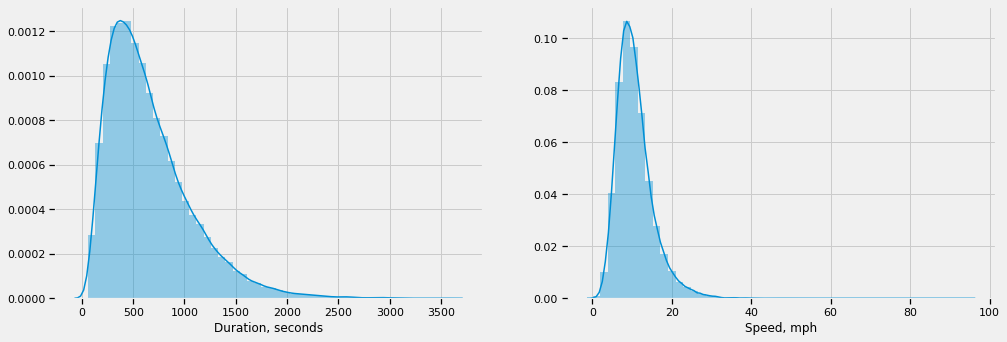

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(train['duration'], ax=ax1)
ax1.set_xlabel('Duration, seconds')

sns.distplot(train['speed'], ax=ax2)
ax2.set_xlabel('Speed, mph')

The `duration` has a large right-skew and a larger dynamics range, which can create challenges. `speed` is much closed to a symmetric distribution, which is the likely explanation for this improved performance. Another option to try would be to use a `log` transformation on `duration`.

Text(0.5, 0, 'log Duration, seconds')

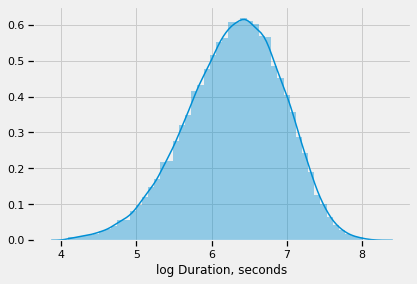

In [38]:
ax= sns.distplot(np.log(train['duration']))
ax.set_xlabel('log Duration, seconds')

Next, let's select the best model based on its validation score.

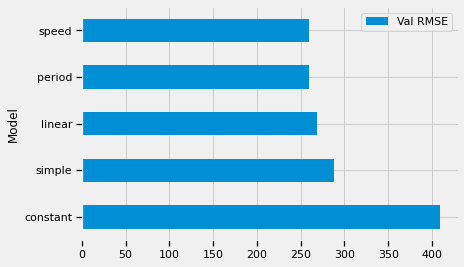

In [39]:
models = ['constant', 'simple', 'linear', 'period', 'speed']
pd.DataFrame.from_dict({
    'Model': models,
    'Val RMSE': [eval(m + '_rmse') for m in models]
}).set_index('Model').plot(kind='barh');

Based on the results presented above, we select the `speed` model, which has the lowest RMSE on the validation dataset.

## Question 4f
The last step is to unlock out test dataset and compute the RMSE for the `speed` model as our final evaluation of the model's generalization error.

In [40]:
# Write your code here

linear_model = LinearRegression(fit_intercept= True).fit(create_features(train), train[['speed']])
y_fitted_speed_test = linear_model.predict(create_features(test))
Error = test['distance'] / y_fitted_speed_test.squeeze() * 3600 - test['duration']
speed_rmse_test =rmse(Error)

# Print score
print('Speed multiple linear regression model test RMSE: {} seconds'.format(speed_rmse_test))

Speed multiple linear regression model test RMSE: 262.29264035984505 seconds


**Congratulation, you're done Assignment 7. Review your answers and clean up that code before submitting on Quercus. `#cleancode`**